# Team 12 - Project One - Analyze Census Data

Our goal is to conduct predictive analysis and determine if the income of a random adult American citizen is based on given features, such as age, education, occupation, gender, race, work week, native region, family status, etc. We want to predict when a person will earn more than or less than 50,0000 dollars a year.

## Step 1:  Clean and transform the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Read the dataset
input_csv = pd.read_csv("adult.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

(32561, 15)

In [2]:
# Display the input data for preview
input_csv

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
# List the categorical columns present in the dataset
input_csv.select_dtypes(exclude=np.number).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [4]:
# List the numerical columns present in the dataset
input_csv.select_dtypes(include=np.number).columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [5]:
# Checking for null values
input_csv.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
# Checking income
input_csv["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [7]:
# Converting the counts to percentages
input_csv["income"].value_counts(normalize=True)*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

### Checking for duplicate records

In [8]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby(["age", "workclass", "fnlwgt",
                               "education","education.num","marital.status", 
                               "occupation","relationship","race",
                               "sex", "capital.gain","capital.loss",
                               "hours.per.week","native.country","income"])
len(csv_group)

32537

In [9]:
# Get all the data for the duplicate rows
duplicateRow = input_csv[input_csv.duplicated()]
duplicateRow

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
# Overview of the duplicate data
duplicateRow.shape

(24, 15)

In [11]:
# List the index for each duplicated rows
list_index = input_csv[input_csv.duplicated()].index.tolist()
list_index

[8453,
 8645,
 12202,
 14346,
 15603,
 17344,
 19067,
 20388,
 20507,
 22783,
 22934,
 23276,
 23660,
 23720,
 23827,
 26738,
 27133,
 28796,
 29051,
 29334,
 29604,
 31060,
 32065,
 32419]

In [12]:
# Create a clean DataFrame by dropping the duplicate rows by its index
dropped_df = input_csv.drop(list_index)
dropped_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [13]:
# Overview of the data after dropping duplicates
dropped_df.shape

(32537, 15)

## Work Class

Drop the never-worked from the dataset

In [14]:
# Overview of workclass
dropped_df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

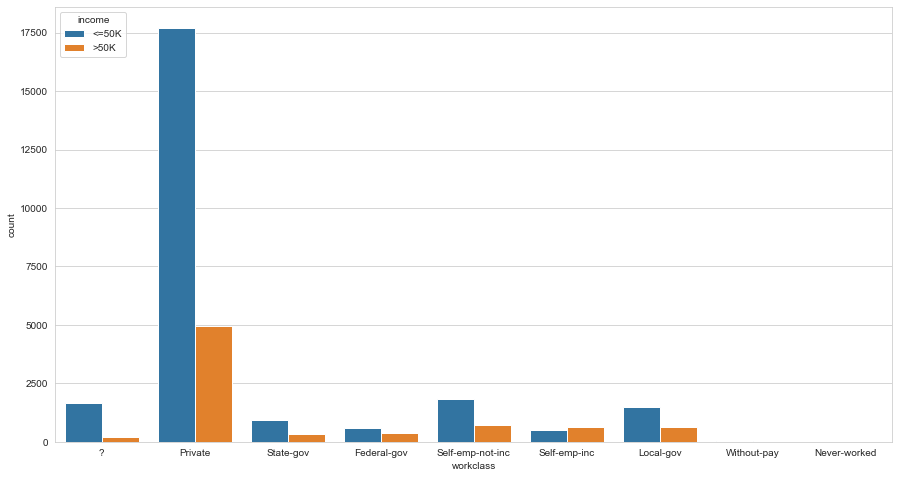

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(dropped_df["workclass"], hue=dropped_df["income"])

In [16]:
# Dropping the never-worked from the dataset
never_worked = dropped_df[dropped_df["workclass"] == "Never-worked"]
never_worked.shape

(7, 15)

In [17]:
# View the never-worked data
never_worked

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [18]:
# List the index for each never-worked
list_index2 = dropped_df[dropped_df["workclass"] == "Never-worked"].index.tolist()
list_index2

[8874, 13675, 17089, 21934, 24483, 32331, 32338]

In [19]:
# Create a clean DataFrame by dropping the never-worked rows by its index
dropped_df2 = dropped_df.drop(list_index2)
dropped_df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Replacing missing values with Not-Available

* Some of the variables have a value of "?“
* According to the documentation provided for the census dataset, the values marked with ”?" are missing values

In [20]:
# Replacing missing data with Not-Available
replaced_df = dropped_df2.replace(to_replace ="?", 
                                 value ="Not-Available") 

In [21]:
# Preview clean dataset
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Observation from the basic analysis of the dataset

* No null values are present in the dataset, however, there is some missing data
* Identified and removed duplicate records
* The "never-worked" showed values in "hours per week". This could impact any analysis of work week so we dropped those records from the dataset
* Not sure what "fnlwght" column is. It looks like an ID column.
* The dataset is made up of predominately - nearly 76% - of people earning less than, or equl to 50K. This is where we will "peel back the layers of the onion".

## Income
Income is the response variable, also called dependent variable 

In [22]:
# Overview of income
replaced_df["income"].value_counts()

<=50K    24691
>50K      7839
Name: income, dtype: int64

In [23]:
# Converting the counts to percentages
replaced_df["income"].value_counts(normalize=True)*100

<=50K    75.902244
>50K     24.097756
Name: income, dtype: float64

## Three variables this analysis will focus on: 
#### Age, Work Week Hours, Work Class (employment type)

## Age

In [24]:
# Overview of age
replaced_df["age"].value_counts()

36    898
31    888
34    886
23    875
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

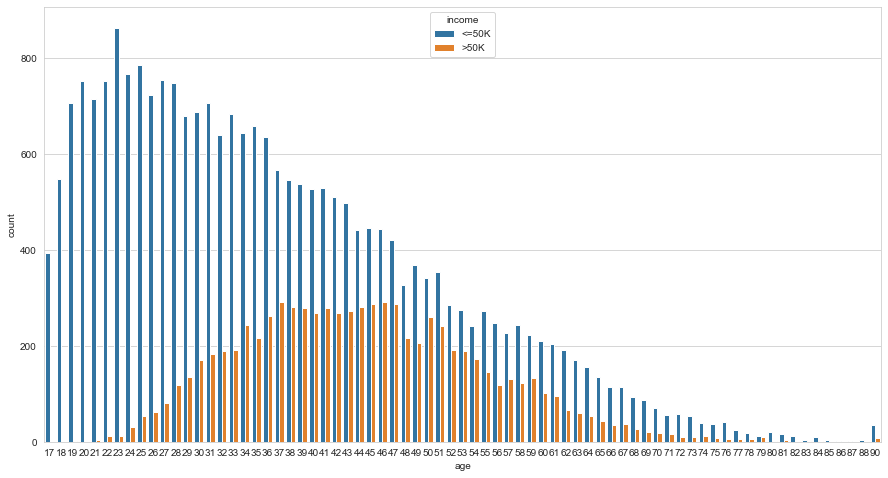

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["age"], hue=replaced_df["income"])

In [26]:
replaced_df["age"].min()

17

In [27]:
replaced_df["age"].max()

90

In [28]:
replaced_df["age"].median()

37.0

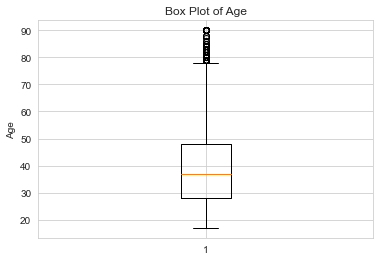

In [29]:
# Look at age data set and compute quantiles
age = replaced_df["age"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.set_ylabel('Age')
ax1.boxplot(age)
plt.show()

In [30]:
# Get quartile calculations
quartiles = age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of age is: {lowerq}")
print(f"The upper quartile of age is: {upperq}")
print(f"The interquartile range of age is: {iqr}")
print(f"The the median of age is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of age is: 28.0
The upper quartile of age is: 48.0
The interquartile range of age is: 20.0
The the median of age is: 37.0 
Values below -2.0 could be outliers.
Values above 78.0 could be outliers.


In [31]:
# Create the bins in which age will be held
# Bins are 0, 17, 22, 33, 40, 57, 65, 78, 99   
bins = [0, 17, 22, 33, 40, 57, 65, 78, 99]

# Create the names for the age bins
group_labels = ["< 18", "18-22", "23-33", "34-40", "41-57", "58-65", "66-78", "> 78"]

In [32]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Age Category"] = pd.cut(replaced_df["age"], bins, labels=group_labels)

In [33]:
# Preview the dataset with the Age Category
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65


In [34]:
# Creating a group based off of the Age Category
age_group = replaced_df.groupby("Age Category")
age_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,education.num,capital.gain,capital.loss,hours.per.week
Age Category,,,,,
< 18,17.000000,6.649746,109.969543,41.857868,21.345178
18-22,20.127830,9.203497,172.293780,38.049871,31.973345
23-33,28.042877,10.205746,522.578680,64.451021,41.296036
34-40,36.921371,10.423555,1112.016465,96.743952,43.431788
41-57,47.793189,10.388900,1733.734512,116.752184,43.196386
58-65,60.970095,9.592207,1506.734481,91.636158,39.021749
66-78,70.087685,9.413793,1987.007882,121.714286,29.143842
> 78,83.887324,9.514085,1290.387324,135.007042,28.176056


In [35]:
# Age Category count
replaced_df["Age Category"].value_counts()

41-57    10072
23-33     9259
34-40     5952
18-22     3489
58-65     2207
66-78     1015
< 18       394
> 78       142
Name: Age Category, dtype: int64

## Work Class

In [36]:
# Overview of workclass
replaced_df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Not-Available        1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64

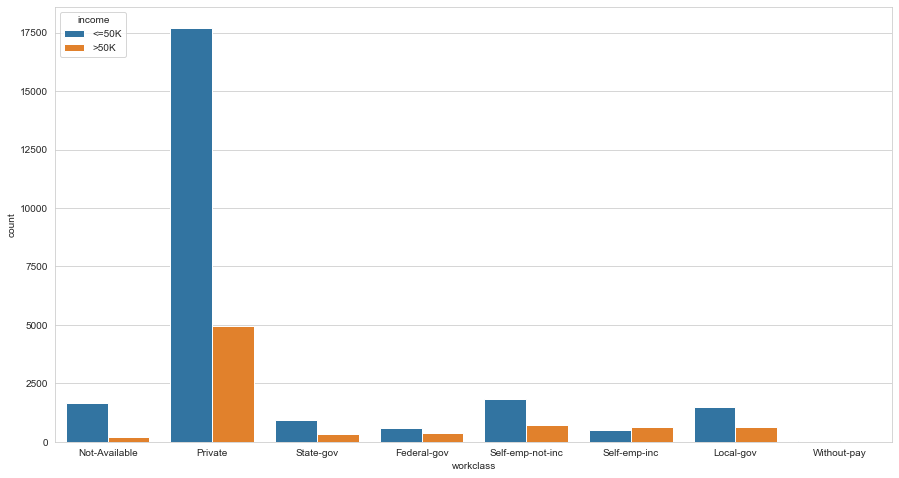

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["workclass"], hue=replaced_df["income"])

## Hours Per Week

In [38]:
# Overview of hours.per.week
replaced_df["hours.per.week"].value_counts()

40    15201
50     2817
45     1823
60     1475
35     1295
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

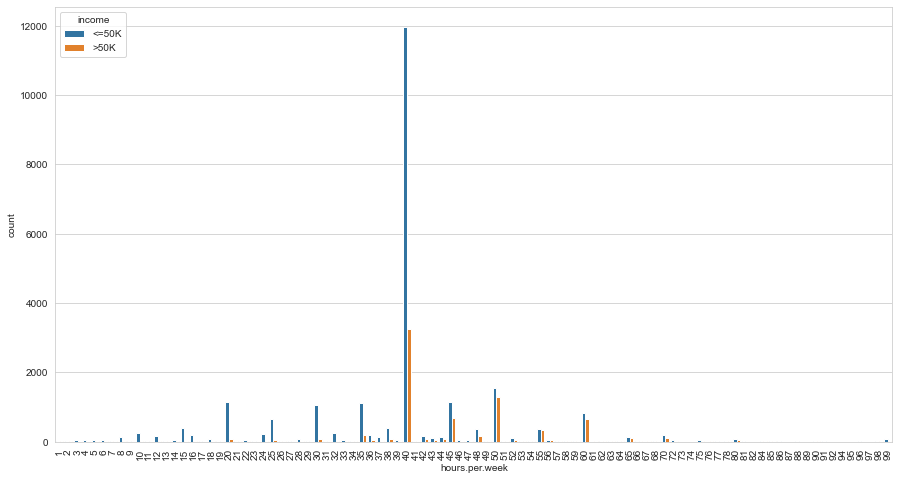

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["hours.per.week"], hue=replaced_df["income"])
plt.xticks(rotation=90)

In [40]:
# Overview of hours.per.week
replaced_df["hours.per.week"].min()

1

In [41]:
# Overview of hours.per.week
replaced_df["hours.per.week"].max()

99

In [42]:
# Overview of hours.per.week
replaced_df["hours.per.week"].median()

40.0

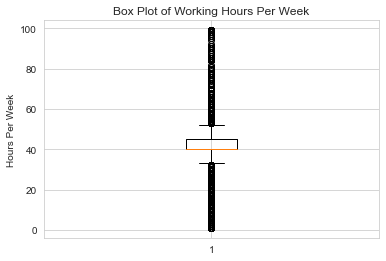

In [43]:
# Look at hours.per.week data set and compute quantiles
hours_per_week = replaced_df["hours.per.week"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Working Hours Per Week')
ax1.set_ylabel('Hours Per Week')
ax1.boxplot(hours_per_week)
plt.show()

In [44]:
# Get quartile calculations
quartiles = hours_per_week.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of hours per week is: {lowerq}")
print(f"The upper quartile of hours per week is: {upperq}")
print(f"The interquartile range of hours per week is: {iqr}")
print(f"The the median of hours per week is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of hours per week is: 40.0
The upper quartile of hours per week is: 45.0
The interquartile range of hours per week is: 5.0
The the median of hours per week is: 40.0 
Values below 32.5 could be outliers.
Values above 52.5 could be outliers.


### Group the working hours into categories

    less than 40
    between 40 and 45
    between 45 and 60
    between 60 and 80
    more than 80

In [45]:
# Create the bins in which hours.per.week will be held
# Bins are 0, 39, 45, 60, 80, 99   
bins = [0, 39, 45, 60, 80, 99]

# Create the names for the Hours Per Week bins
group_labels = ["< 40 hours", "40-45 hours", "46-60 hours", "61-80 hours", "> 80 hours"]

In [46]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Hours Per Week"] = pd.cut(replaced_df["hours.per.week"], bins, labels=group_labels)

In [47]:
# Preview the dataset with the Hours Per Week category
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours


In [48]:
# Creating a group based off of the Hours Per Week bins
work_hours_group = replaced_df.groupby("Hours Per Week")
work_hours_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,education.num,capital.gain,capital.loss,hours.per.week
Hours Per Week,,,,,
< 40 hours,36.794531,9.614214,575.181091,57.022443,25.399974
40-45 hours,38.705646,9.988607,783.465480,85.228035,40.617277
46-60 hours,40.219585,10.879834,2232.885975,124.618423,53.016929
61-80 hours,40.133038,10.639690,3574.199557,133.889135,70.328160
> 80 hours,41.721154,9.971154,629.716346,122.201923,92.543269


In [49]:
# Hours Per Week category count
replaced_df["Hours Per Week"].value_counts()

40-45 hours    17642
< 40 hours      7753
46-60 hours     6025
61-80 hours      902
> 80 hours       208
Name: Hours Per Week, dtype: int64

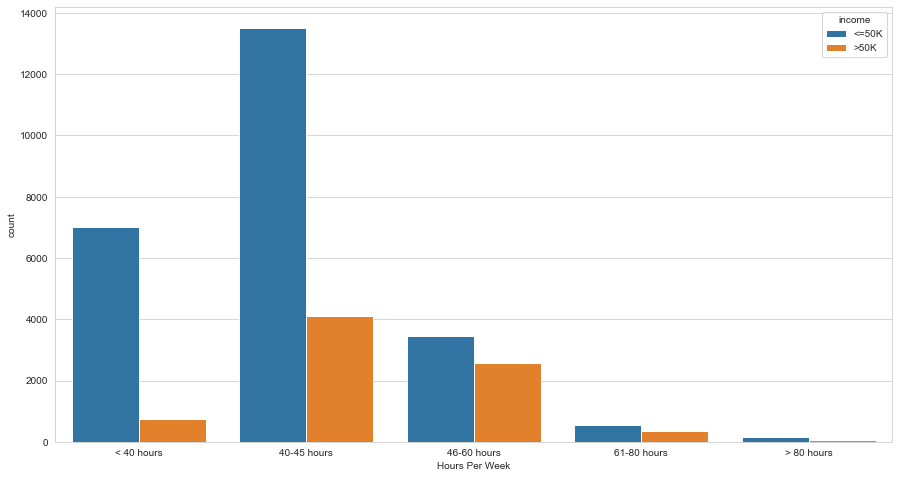

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["Hours Per Week"], hue=replaced_df["income"])

## Native Country

In [51]:
# Overview of native.country
replaced_df["native.country"].value_counts()

United-States                 29146
Mexico                          639
Not-Available                   582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [52]:
# Define the Native Regions
region = {
    "Cambodia": "Asia East", "China": "Asia East", "Hong": "Asia East", "Laos": "Asia East",
    "Thailand": "Asia East", "Japan": "Asia East", "Taiwan": "Asia East", "Vietnam": "Asia East",
    "Philippines": "Asia East","India": "Asia Central", "Iran": "Asia Central",
    "Cuba": "Central America", "Guatemala": "Central America", "Jamaica": "Central America", 
    "Nicaragua": "Central America", "Puerto-Rico": "Central America",  "Dominican-Republic": "Central America", 
    "El-Salvador": "Central America", "Haiti": "Central America", "Honduras": "Central America", 
    "Mexico": "Central America", "Trinadad&Tobago": "Central America",
    "Ecuador": "South America", "Peru": "South America", "Columbia": "South America",
    "England": "Europe West", "Germany": "Europe West", "Holand-Netherlands": "Europe West", 
    "Ireland": "Europe West", "France": "Europe West", "Greece": "Europe West", 
    "Italy": "Europe West", "Portugal": "Europe West", "Scotland": "Europe West",
    "Poland": "Europe East", "Yugoslavia": "Europe East", "Hungary": "Europe East",
    "South": "South Pacific", "Outlying-US(Guam-USVI-etc)":  "South Pacific",  
    "United-States": " United States"
}

In [53]:
# Add the Native Region to the dataset
replaced_df["Native Region"] = replaced_df["native.country"].replace(region)
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


In [54]:
# Creating a group based off of the Native Region
native_region_group = replaced_df.groupby("Native Region", as_index=False)
native_region_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Native Region,age,education.num,capital.gain,capital.loss,hours.per.week
0,United States,38.661772,10.170487,1090.126844,88.583476,40.454779
1,Asia Central,38.489510,12.419580,3135.748252,129.825175,42.265734
2,Asia East,37.922348,10.890152,1066.585227,105.727273,39.785985
3,Canada,42.545455,10.652893,1504.132231,129.933884,40.404959
4,Central America,35.613156,7.152702,405.983555,37.819107,39.414252
5,Europe East,43.258427,10.168539,628.415730,41.786517,39.056180
6,Europe West,41.259259,10.189815,737.289352,75.851852,41.930556
7,Not-Available,38.740550,10.601375,1809.621993,118.469072,41.515464
8,South America,37.813559,9.389831,231.016949,29.237288,38.220339
9,South Pacific,38.744681,10.819149,1591.265957,144.191489,42.329787


In [55]:
# Native Region category count
replaced_df["Native Region"].value_counts()

 United States     29146
Central America     1277
Not-Available        582
Asia East            528
Europe West          432
Asia Central         143
Canada               121
South America        118
South Pacific         94
Europe East           89
Name: Native Region, dtype: int64

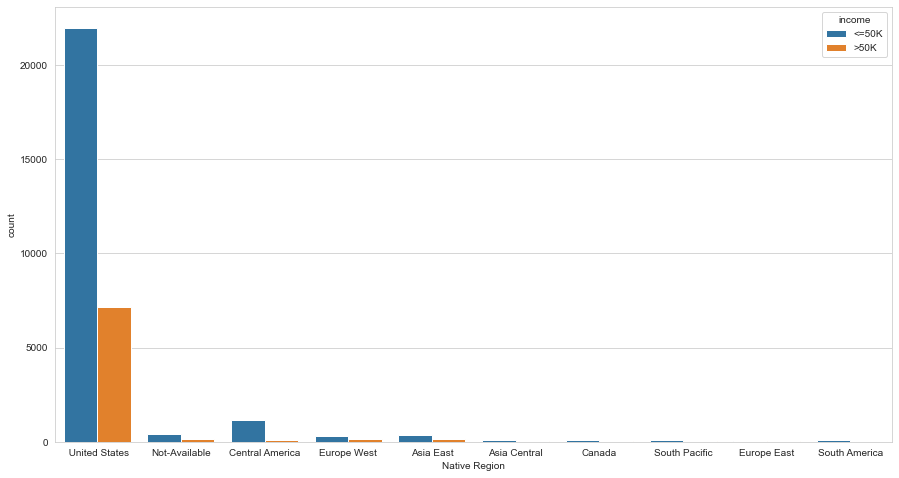

In [56]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["Native Region"], hue=replaced_df["income"])

## Education

In [57]:
# Overview of education
replaced_df["education"].value_counts()

HS-grad         10493
Some-college     7280
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1174
Assoc-acdm       1067
10th              931
7th-8th           644
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [58]:
# Overview of education.num
replaced_df["education.num"].value_counts()

9     10493
10     7280
13     5353
14     1722
11     1382
7      1174
12     1067
6       931
4       644
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education.num, dtype: int64

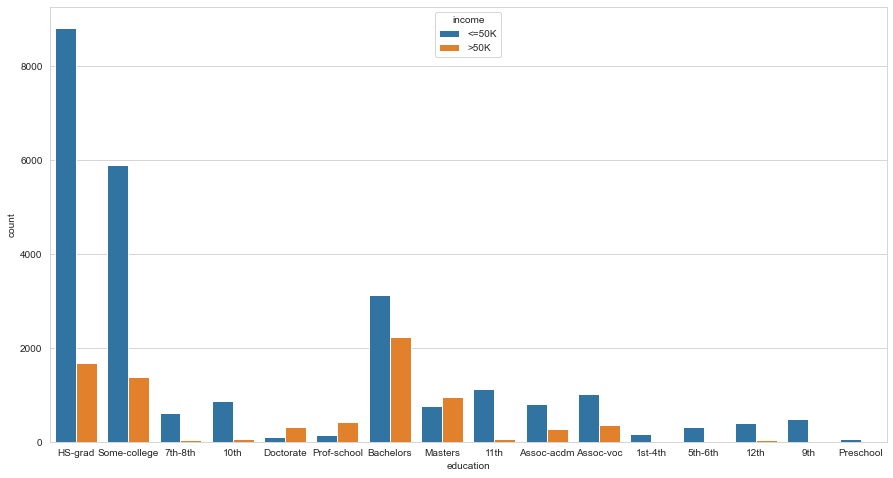

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["education"], hue=replaced_df["income"])

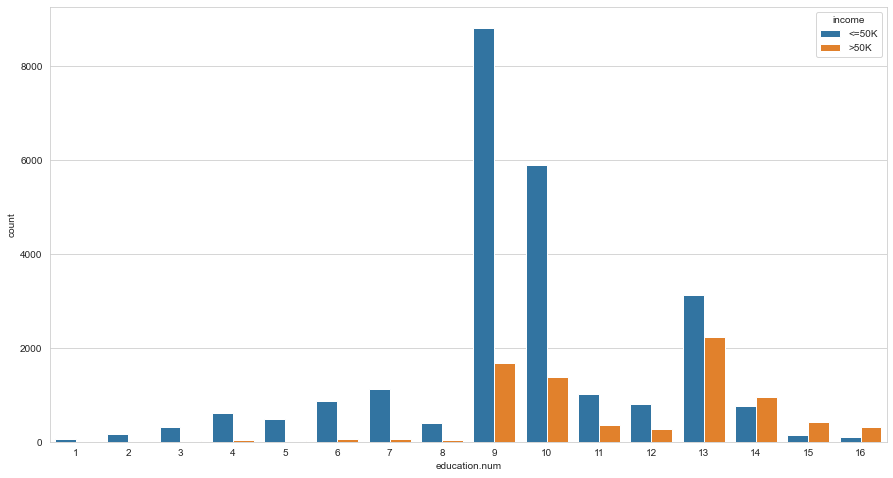

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["education.num"], hue=replaced_df["income"])

## Marital Status

In [61]:
# Overview of marital.status
replaced_df["marital.status"].value_counts()

Married-civ-spouse       14969
Never-married            10662
Divorced                  4440
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

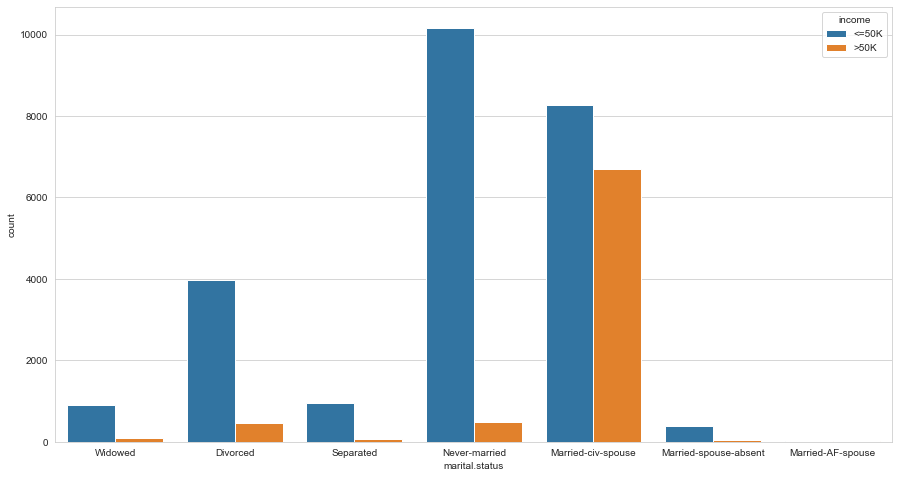

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["marital.status"], hue=replaced_df["income"])

## Occupation

In [63]:
# Overview of occupation
replaced_df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Not-Available        1836
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

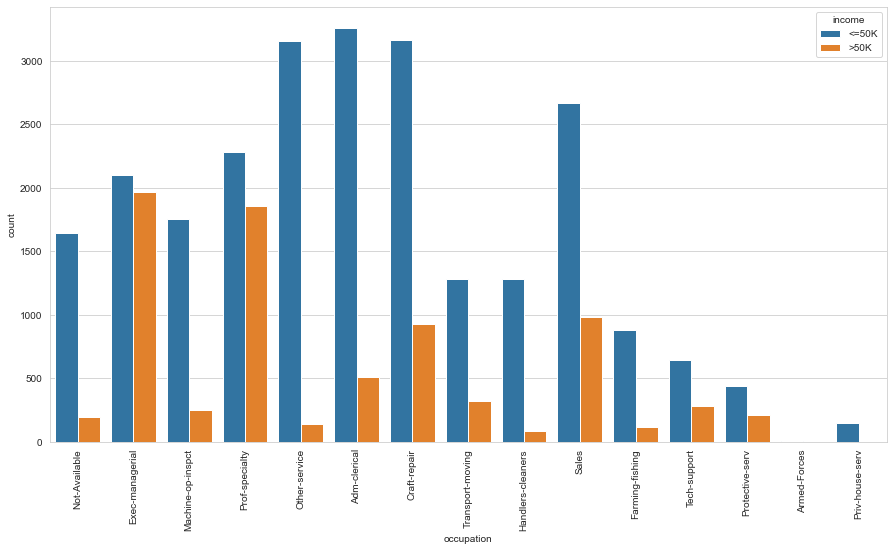

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["occupation"], hue=replaced_df["income"])
plt.xticks(rotation=90)

## Relationship

In [65]:
# Overview of relationship
replaced_df["relationship"].value_counts()

Husband           13187
Not-in-family      8291
Own-child          5059
Unmarried          3445
Wife               1567
Other-relative      981
Name: relationship, dtype: int64

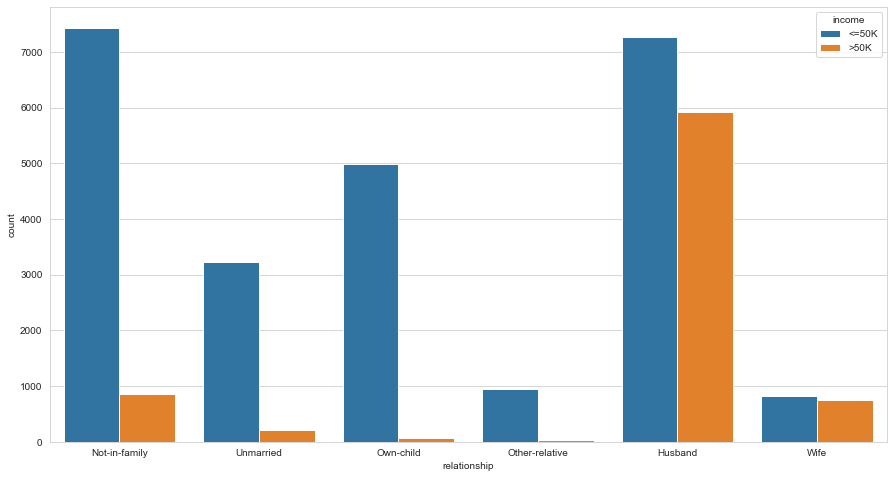

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["relationship"], hue=replaced_df["income"])

## Race

In [67]:
# Overview of race
replaced_df["race"].value_counts()

White                 27790
Black                  3120
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [68]:
# Converting the counts to percentages
replaced_df["race"].value_counts(normalize=True)*100

White                 85.428835
Black                  9.591147
Asian-Pac-Islander     3.190901
Amer-Indian-Eskimo     0.956041
Other                  0.833077
Name: race, dtype: float64

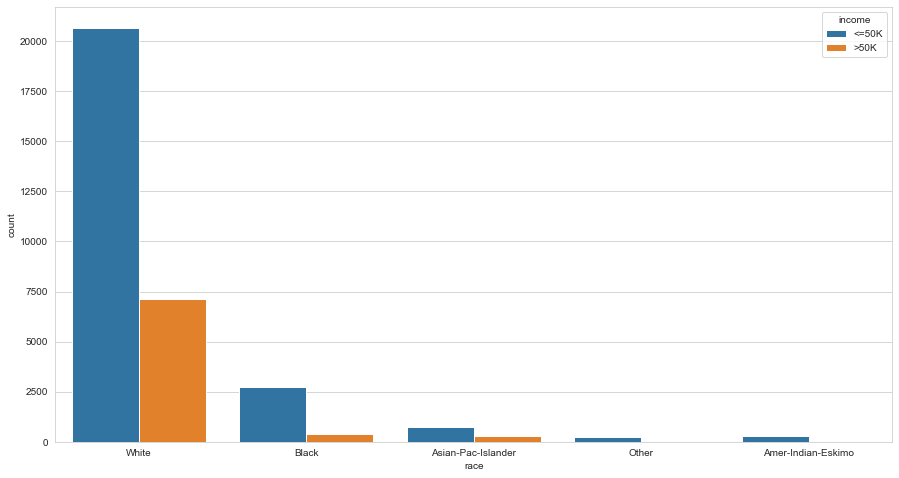

In [69]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["race"], hue=replaced_df["income"])

## Sex

In [70]:
# Overview of sex
replaced_df["sex"].value_counts()

Male      21770
Female    10760
Name: sex, dtype: int64

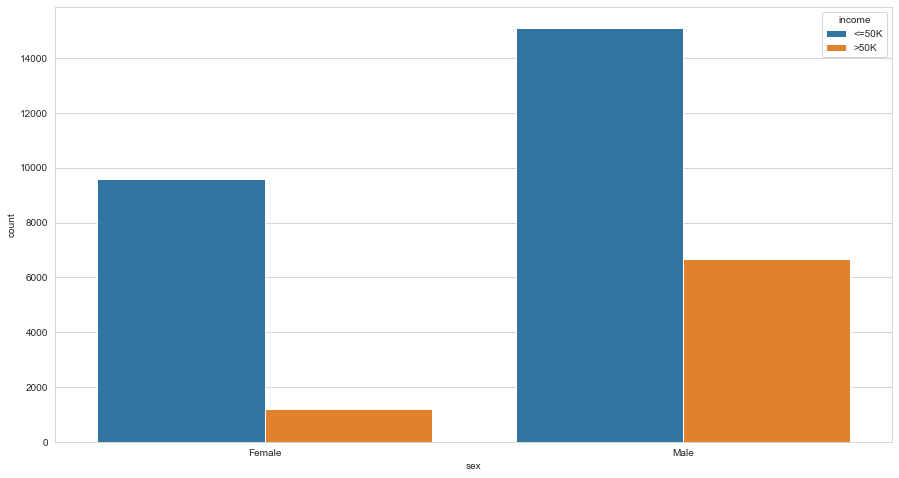

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(replaced_df["sex"], hue=replaced_df["income"])

## Capital Gain and Capital Loss


In [72]:
# Overview of capital.gain
replaced_df["capital.gain"].value_counts()

0        29818
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

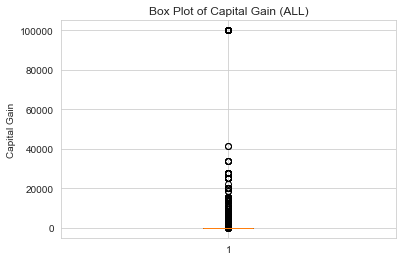

In [73]:
# Look at capital gain data set and compute quantiles
capital_gain_all = replaced_df["capital.gain"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Gain (ALL)')
ax1.set_ylabel('Capital Gain')
ax1.boxplot(capital_gain_all)
plt.show()

In [74]:
# Get quartile calculations
quartiles = capital_gain_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital gain is: {lowerq}")
print(f"The upper quartile of capital gain is: {upperq}")
print(f"The interquartile range of capital gain is: {iqr}")
print(f"The the median of capital gain is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital gain is: 0.0
The upper quartile of capital gain is: 0.0
The interquartile range of capital gain is: 0.0
The the median of capital gain is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.


In [75]:
# Look at non-zero capital gain data set and compute quantiles
capital_gain_nonzero = replaced_df[(replaced_df["capital.gain"] != 0)]

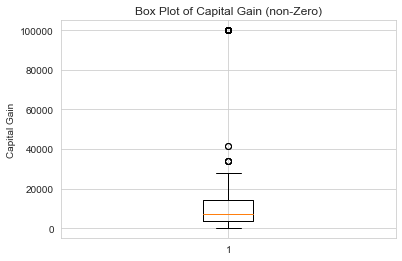

In [76]:
# Look at capital gain data set and compute quantiles
capital_gain = capital_gain_nonzero["capital.gain"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Gain (non-Zero)')
ax1.set_ylabel('Capital Gain')
ax1.boxplot(capital_gain)
plt.show()

In [77]:
# Get quartile calculations
quartiles = capital_gain.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital gain is: {lowerq}")
print(f"The upper quartile of capital gain is: {upperq}")
print(f"The interquartile range of capital gain is: {iqr}")
print(f"The the median of capital gain is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital gain is: 3411.0
The upper quartile of capital gain is: 14084.0
The interquartile range of capital gain is: 10673.0
The the median of capital gain is: 7298.0 
Values below -12598.5 could be outliers.
Values above 30093.5 could be outliers.


In [78]:
# Overview of capital.loss
replaced_df["capital.loss"].value_counts()

0       31011
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

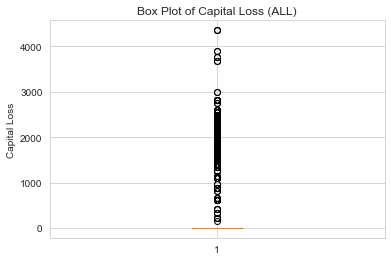

In [79]:
# Look at capital gain data set and compute quantiles
capital_loss_all = replaced_df["capital.loss"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Loss (ALL)')
ax1.set_ylabel('Capital Loss')
ax1.boxplot(capital_loss_all)
plt.show()

In [80]:
# Get quartile calculations
quartiles = capital_loss_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital loss is: {lowerq}")
print(f"The upper quartile of capital loss is: {upperq}")
print(f"The interquartile range of capital loss is: {iqr}")
print(f"The the median of capital loss is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital loss is: 0.0
The upper quartile of capital loss is: 0.0
The interquartile range of capital loss is: 0.0
The the median of capital loss is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.


In [81]:
# Look at non-zero capital loss data set and compute quantiles
capital_loss_nonzero = replaced_df[(replaced_df["capital.loss"] != 0)]

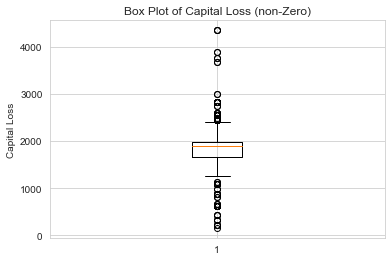

In [82]:
# Look at capital loss data set and compute quantiles
capital_loss = capital_loss_nonzero["capital.loss"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Loss (non-Zero)')
ax1.set_ylabel('Capital Loss')
ax1.boxplot(capital_loss)
plt.show()

In [83]:
# Get quartile calculations
quartiles = capital_loss.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital loss is: {lowerq}")
print(f"The upper quartile of capital loss is: {upperq}")
print(f"The interquartile range of capital loss is: {iqr}")
print(f"The the median of capital loss is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital loss is: 1672.0
The upper quartile of capital loss is: 1977.0
The interquartile range of capital loss is: 305.0
The the median of capital loss is: 1887.0 
Values below 1214.5 could be outliers.
Values above 2434.5 could be outliers.


## Export the cleaned and transformed dataset as a CSV

This file can be used by the team to create their own analyses

In [84]:
replaced_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States


In [85]:
# Export replaced_df as a CSV, without the Pandas index, but with the header
replaced_df.to_csv("replaced.csv", index=False, header=True)

## Store the cleaned and transformed CSV into DataFrame

Load the csv exported in Step 1 into a DataFrame

In [86]:
# File to Load
clean_data_to_load = "replaced.csv"

In [87]:
# Read the cleaned and transformed census data and store into Pandas DataFrames
replaced_df2 = pd.read_csv(clean_data_to_load, encoding="utf-8")
replaced_df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States


## Step 2:  Preliminary analysis to understand the impact of each predictor on income

### Age Category

In [88]:
# Creating a group based off of the Age Category
age_category_group = replaced_df.groupby(["Age Category", "income"], as_index=False)
age_category_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Age Category,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,< 18,<=50K,17.000000,6.649746,109.969543,41.857868,21.345178
1,< 18,>50K,NaN,NaN,NaN,NaN,NaN
2,18-22,<=50K,20.120714,9.202247,71.911265,37.433593,31.901181
3,18-22,>50K,21.500000,9.444444,19529.388889,156.888889,45.888889
4,23-33,<=50K,27.777266,9.997759,123.877864,47.012824,40.543825
5,23-33,>50K,29.781581,11.567237,3132.493073,178.602282,46.220049
6,34-40,<=50K,36.833820,9.858394,175.702433,58.370560,42.088321
7,34-40,>50K,37.116721,11.684582,3201.186211,182.365364,46.429425
8,41-57,<=50K,47.736470,9.594187,157.873936,62.366469,41.574595
9,41-57,>50K,47.885046,11.675943,4285.849935,204.830169,45.822887


In [89]:
# Age Category count
age_summary=age_category_group[["age",]].count()
age_summary.rename(columns = {"age": "count"}, inplace = True)
age_summary

,Age Category,income,count
0,< 18,<=50K,394.0
1,< 18,>50K,NaN
2,18-22,<=50K,3471.0
3,18-22,>50K,18.0
4,23-33,<=50K,8032.0
5,23-33,>50K,1227.0
6,34-40,<=50K,4110.0
7,34-40,>50K,1842.0
8,41-57,<=50K,6227.0
9,41-57,>50K,3845.0


### Hours Per Week category

In [90]:
# Creating a group based off of the Hours Per Week category
hours_per_week_category_group = replaced_df.groupby(["Hours Per Week", "income"], as_index=False)
hours_per_week_category_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Hours Per Week,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,< 40 hours,<=50K,35.574198,9.379187,125.821525,43.148396,25.096793
1,< 40 hours,>50K,48.394309,11.848238,4846.532520,188.901084,28.281843
2,40-45 hours,<=50K,37.041269,9.576437,145.760299,56.097034,40.510687
3,40-45 hours,>50K,44.166464,11.340937,2875.776025,180.806843,40.966998
4,46-60 hours,<=50K,37.801972,10.072195,202.638446,60.672079,52.897941
5,46-60 hours,>50K,43.456522,11.961180,4951.179348,210.236025,53.176242
6,61-80 hours,<=50K,38.595365,9.884135,164.311943,63.244207,70.344029
7,61-80 hours,>50K,42.662757,11.882698,9184.014663,250.111437,70.302053
8,> 80 hours,<=50K,41.462069,9.586207,224.958621,53.662069,92.655172
9,> 80 hours,>50K,42.317460,10.857143,1561.301587,279.952381,92.285714


In [91]:
# Hours Per Week category count
hours_per_week_summary=hours_per_week_category_group[["age",]].count()
hours_per_week_summary.rename(columns = {"age": "count"}, inplace = True)
hours_per_week_summary

,Hours Per Week,income,count
0,< 40 hours,<=50K,7015
1,< 40 hours,>50K,738
2,40-45 hours,<=50K,13521
3,40-45 hours,>50K,4121
4,46-60 hours,<=50K,3449
5,46-60 hours,>50K,2576
6,61-80 hours,<=50K,561
7,61-80 hours,>50K,341
8,> 80 hours,<=50K,145
9,> 80 hours,>50K,63


### Work Class

In [92]:
# Creating a group based off of the workclass
workclass_group = replaced_df.groupby(["workclass", "income"], as_index=False)
workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Federal-gov,<=50K,40.624788,10.483871,173.207131,91.278438,40.093379
1,Federal-gov,>50K,45.711590,11.752022,1881.088949,145.592992,43.420485
2,Local-gov,<=50K,40.704607,10.580623,169.179539,79.185637,39.739837
3,Local-gov,>50K,44.254457,12.145867,2581.126418,183.220421,43.956240
4,Not-Available,<=50K,39.258359,9.023100,159.157447,47.961702,31.428571
5,Not-Available,>50K,55.617801,11.303665,4462.109948,170.989529,36.146597
6,Private,<=50K,35.117209,9.447550,137.621217,50.000226,38.806007
7,Private,>50K,42.816368,11.429147,3576.726466,187.517436,45.501512
8,Self-emp-inc,<=50K,43.206478,10.198381,177.941296,54.368421,47.135628
9,Self-emp-inc,>50K,48.249196,11.882637,8606.705788,235.172026,50.154341


In [93]:
# Workclass category count
workclass_summary=workclass_group[["age",]].count()
workclass_summary.rename(columns = {"age": "count"}, inplace = True)
workclass_summary

,workclass,income,count
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,Not-Available,<=50K,1645
5,Not-Available,>50K,191
6,Private,<=50K,17712
7,Private,>50K,4961
8,Self-emp-inc,<=50K,494
9,Self-emp-inc,>50K,622


### Native Region category

In [94]:
# Creating a group based off of the Native Region
native_region_group = replaced_df.groupby(["Native Region", "income"], as_index=False)
native_region_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Native Region,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,United States,<=50K,36.823088,9.710880,151.222778,54.026664,38.807117
1,United States,>50K,44.298368,11.579439,3968.393639,194.519459,45.505789
2,Asia Central,<=50K,36.435294,11.600000,148.176471,42.129412,39.176471
3,Asia Central,>50K,41.500000,13.620690,7514.086207,258.344828,46.793103
4,Asia East,<=50K,36.431579,10.194737,110.939474,66.671053,38.200000
5,Asia East,>50K,41.750000,12.675676,3520.270270,206.006757,43.858108
6,Canada,<=50K,41.012195,10.243902,110.695122,145.524390,37.914634
7,Canada,>50K,45.769231,11.512821,4433.923077,97.153846,45.641026
8,Central America,<=50K,35.020443,6.883305,119.210392,28.615843,39.058773
9,Central America,>50K,42.368932,10.223301,3674.640777,142.718447,43.466019


In [95]:
# Native Region category count
native_region_summary=native_region_group[["age",]].count()
native_region_summary.rename(columns = {"age": "count"}, inplace = True)
native_region_summary

,Native Region,income,count
0,United States,<=50K,21977
1,United States,>50K,7169
2,Asia Central,<=50K,85
3,Asia Central,>50K,58
4,Asia East,<=50K,380
5,Asia East,>50K,148
6,Canada,<=50K,82
7,Canada,>50K,39
8,Central America,<=50K,1174
9,Central America,>50K,103


### Education

In [96]:
# Creating a group based off of education.num and education
education_num_group = replaced_df.groupby(["education.num", "education", "income"], as_index=False)
education_num_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,education.num,education,income,age,capital.gain,capital.loss,hours.per.week
0,1,Preschool,<=50K,43.200000,916.360000,67.820000,36.380000
1,2,1st-4th,<=50K,46.187500,84.118750,50.743750,37.837500
2,2,1st-4th,>50K,52.000000,1281.333333,0.000000,48.833333
3,3,5th-6th,<=50K,42.753165,99.819620,65.952532,38.487342
4,3,5th-6th,>50K,46.750000,1692.000000,117.937500,46.000000
5,4,7th-8th,<=50K,48.203642,174.059603,60.688742,38.834437
6,4,7th-8th,>50K,52.725000,1149.825000,144.150000,47.500000
7,5,9th,<=50K,40.630390,134.453799,22.229979,37.667351
8,5,9th,>50K,48.814815,4087.222222,151.074074,44.851852
9,6,10th,<=50K,36.554661,135.466053,37.253165,36.577675


In [97]:
# marital.status count
education_summary=education_num_group[["age",]].count()
education_summary.rename(columns = {"age": "count"}, inplace = True)
education_summary

,education.num,education,income,count
0,1,Preschool,<=50K,50
1,2,1st-4th,<=50K,160
2,2,1st-4th,>50K,6
3,3,5th-6th,<=50K,316
4,3,5th-6th,>50K,16
5,4,7th-8th,<=50K,604
6,4,7th-8th,>50K,40
7,5,9th,<=50K,487
8,5,9th,>50K,27
9,6,10th,<=50K,869


### Marital Staus

In [98]:
# Creating a group based off of marital.status
marital_status_group = replaced_df.groupby(["marital.status", "income"], as_index=False)
marital_status_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,marital.status,income,age,capital.gain,capital.loss,hours.per.week
0,Divorced,<=50K,42.744782,140.650742,56.121448,40.539854
1,Divorced,>50K,45.645788,5781.812095,137.853132,47.336933
2,Married-AF-spouse,<=50K,33.384615,204.076923,0.000000,40.000000
3,Married-AF-spouse,>50K,31.300000,729.800000,0.000000,42.600000
4,Married-civ-spouse,<=50K,42.287233,219.381930,60.648146,41.654789
5,Married-civ-spouse,>50K,44.437519,3679.263528,199.034679,45.304335
6,Married-spouse-absent,<=50K,39.981771,106.559896,48.312500,39.192708
7,Married-spouse-absent,>50K,47.323529,6836.647059,164.705882,45.058824
8,Never-married,<=50K,27.669452,99.257005,45.858028,36.479992
9,Never-married,>50K,38.217923,6137.576375,188.971487,46.678208


In [99]:
# marital.status count
marital_summary=marital_status_group[["age",]].count()
marital_summary.rename(columns = {"age": "count"}, inplace = True)
marital_summary

,marital.status,income,count
0,Divorced,<=50K,3977
1,Divorced,>50K,463
2,Married-AF-spouse,<=50K,13
3,Married-AF-spouse,>50K,10
4,Married-civ-spouse,<=50K,8279
5,Married-civ-spouse,>50K,6690
6,Married-spouse-absent,<=50K,384
7,Married-spouse-absent,>50K,34
8,Never-married,<=50K,10171
9,Never-married,>50K,491


### Occupation

In [100]:
# Creating a group based off of occupation
occupation_group = replaced_df.groupby(["occupation", "income"], as_index=False)
occupation_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,occupation,income,age,capital.gain,capital.loss,hours.per.week
0,Adm-clerical,<=50K,35.989267,136.705305,51.412450,37.039865
1,Adm-clerical,>50K,43.254438,2808.587771,121.378698,40.942801
2,Armed-Forces,<=50K,28.250000,0.000000,0.000000,40.750000
3,Armed-Forces,>50K,46.000000,0.000000,1887.000000,40.000000
4,Craft-repair,<=50K,37.653397,148.225276,66.674882,41.609795
5,Craft-repair,>50K,43.712594,2360.839612,163.178687,44.682454
6,Exec-managerial,<=50K,39.618979,184.126848,59.227468,42.816881
7,Exec-managerial,>50K,44.898374,4478.821646,223.738313,47.308435
8,Farming-fishing,<=50K,40.492588,265.746864,43.367161,46.047891
9,Farming-fishing,>50K,47.060870,3070.678261,214.469565,54.208696


In [101]:
# occupation count
occupation_summary=occupation_group[["age",]].count()
occupation_summary.rename(columns = {"age": "count"}, inplace = True)
occupation_summary

,occupation,income,count
0,Adm-clerical,<=50K,3261
1,Adm-clerical,>50K,507
2,Armed-Forces,<=50K,8
3,Armed-Forces,>50K,1
4,Craft-repair,<=50K,3165
5,Craft-repair,>50K,929
6,Exec-managerial,<=50K,2097
7,Exec-managerial,>50K,1968
8,Farming-fishing,<=50K,877
9,Farming-fishing,>50K,115


### Relationship

In [102]:
# Creating a group based off of relationship
relationship_group = replaced_df.groupby(["relationship", "income"], as_index=False)
relationship_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,relationship,income,age,capital.gain,capital.loss,hours.per.week
0,Husband,<=50K,42.920506,206.587677,60.900701,42.394994
1,Husband,>50K,44.922414,3749.181373,202.036173,46.243239
2,Not-in-family,<=50K,37.834028,137.238736,65.051244,39.885541
3,Not-in-family,>50K,42.912383,6019.816589,166.429907,46.773364
4,Other-relative,<=50K,32.816737,162.296610,38.572034,36.783898
5,Other-relative,>50K,42.027027,3272.297297,376.891892,42.675676
6,Own-child,<=50K,24.691306,77.206130,38.448518,33.152244
7,Own-child,>50K,35.820896,6021.626866,124.044776,43.656716
8,Unmarried,<=50K,39.916951,117.820886,33.435699,38.618841
9,Unmarried,>50K,45.848624,5448.756881,160.509174,46.266055


In [103]:
# relationship count
relationship_summary=relationship_group[["age",]].count()
relationship_summary.rename(columns = {"age": "count"}, inplace = True)
relationship_summary

,relationship,income,count
0,Husband,<=50K,7271
1,Husband,>50K,5916
2,Not-in-family,<=50K,7435
3,Not-in-family,>50K,856
4,Other-relative,<=50K,944
5,Other-relative,>50K,37
6,Own-child,<=50K,4992
7,Own-child,>50K,67
8,Unmarried,<=50K,3227
9,Unmarried,>50K,218


### Race

In [104]:
# Creating a group based off of race
race_group = replaced_df.groupby(["race", "income"], as_index=False)
race_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,race,income,age,capital.gain,capital.loss,hours.per.week
0,Amer-Indian-Eskimo,<=50K,36.843636,206.930909,20.374545,39.410909
1,Amer-Indian-Eskimo,>50K,39.694444,3820.888889,139.611111,44.916667
2,Asian-Pac-Islander,<=50K,36.002625,114.472441,58.681102,38.430446
3,Asian-Pac-Islander,>50K,42.373188,5249.224638,203.981884,44.829710
4,Black,<=50K,36.945115,113.620929,44.507501,37.580315
5,Black,>50K,43.713178,4121.260982,173.136951,44.382429
6,Other,<=50K,32.646341,72.174797,59.605691,38.914634
7,Other,>50K,41.440000,9421.520000,75.480000,44.920000
8,White,<=50K,36.849480,155.005852,54.513809,39.020073
9,White,>50K,44.385945,3934.695573,196.597470,45.562474


In [105]:
# race count
race_summary=race_group[["age",]].count()
race_summary.rename(columns = {"age": "count"}, inplace = True)
race_summary

,race,income,count
0,Amer-Indian-Eskimo,<=50K,275
1,Amer-Indian-Eskimo,>50K,36
2,Asian-Pac-Islander,<=50K,762
3,Asian-Pac-Islander,>50K,276
4,Black,<=50K,2733
5,Black,>50K,387
6,Other,<=50K,246
7,Other,>50K,25
8,White,<=50K,20675
9,White,>50K,7115


### Sex

In [106]:
# Creating a group based off of sex
sex_group = replaced_df.groupby(["sex", "income"], as_index=False)
sex_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,sex,income,age,capital.gain,capital.loss,hours.per.week
0,Female,<=50K,36.220019,122.126187,47.418850,35.924016
1,Female,>50K,42.125530,4200.389313,173.648855,40.426633
2,Male,<=50K,37.154666,165.921244,56.874454,40.698478
3,Male,>50K,44.627177,3972.958559,198.840090,46.366817


In [107]:
# gender count
gender_summary=sex_group[["age",]].count()
gender_summary.rename(columns = {"age": "count"}, inplace = True)
gender_summary

,sex,income,count
0,Female,<=50K,9581
1,Female,>50K,1179
2,Male,<=50K,15110
3,Male,>50K,6660


## Step 3:  Test multiple hypotheses and provide observations and insights to the following:

#### AGE - Sarah

1. The older an individual is, the bigger their chances of having a higher income. And can this be explained by the fact that the older one gets, the more experienced professionally they become and this usually means a higher salary? 

#### WORK WEEK - Mark

2.	Do people who earn more than 50K tend to work more hours than those that earn less than 50K? Do men work more hours per week than women at all ages? At what age does the working hours per week decrease and by how much?

#### WORK CLASS - Katrice

3.	Most people are employed in the private sector. Do people in the private sector earn more than the other work classes?


### AGE - Sarah
1. The older an individual is, the bigger their chances of having a higher income. 
2. And can this be explained by the fact that the older one gets, the more experienced professionally they become and this usually means a higher salary? 

In [108]:
# Creating a group based off of age
ageIncome = replaced_df.groupby(["age", "income"], as_index=False)
ageIncome[["education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,income,education.num,capital.gain,capital.loss,hours.per.week
0,17,<=50K,6.649746,109.969543,41.857868,21.345178
1,18,<=50K,8.155393,102.617916,44.579525,25.956124
2,19,<=50K,9.101983,71.594901,44.288952,30.664306
3,19,>50K,6.000000,7512.000000,0.000000,50.000000
4,20,<=50K,9.343542,83.006658,33.387483,32.299601
...,...,...,...,...,...,...
133,86,<=50K,14.000000,0.000000,0.000000,40.000000
134,87,<=50K,9.000000,0.000000,0.000000,2.000000
135,88,<=50K,13.333333,0.000000,0.000000,40.000000
136,90,<=50K,9.235294,715.941176,193.000000,34.735294


In [109]:
# Age Category count
ageIncome_summary = ageIncome[["education.num",]].count()
ageIncome_summary.rename(columns = {"education.num": "count"}, inplace = True)
ageIncome_summary

,age,income,count
0,17,<=50K,394
1,18,<=50K,547
2,19,<=50K,706
3,19,>50K,2
4,20,<=50K,751
...,...,...,...
133,86,<=50K,1
134,87,<=50K,1
135,88,<=50K,3
136,90,<=50K,34


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C85B138160>]],
      dtype=object)

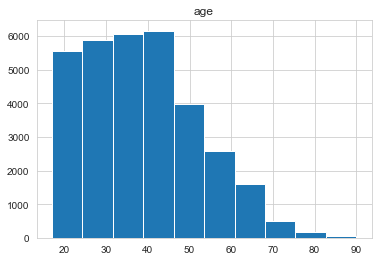

In [110]:
# Histogram of Age
replaced_df.hist(column="age")

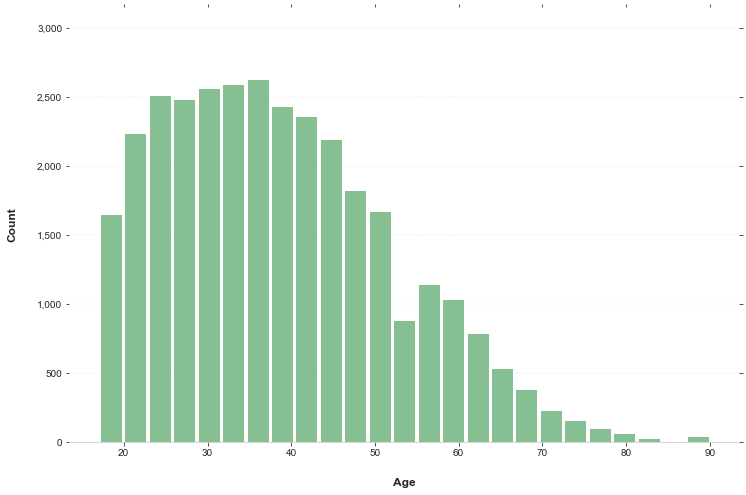

In [111]:
# Histogram of Age
from matplotlib.ticker import StrMethodFormatter

ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

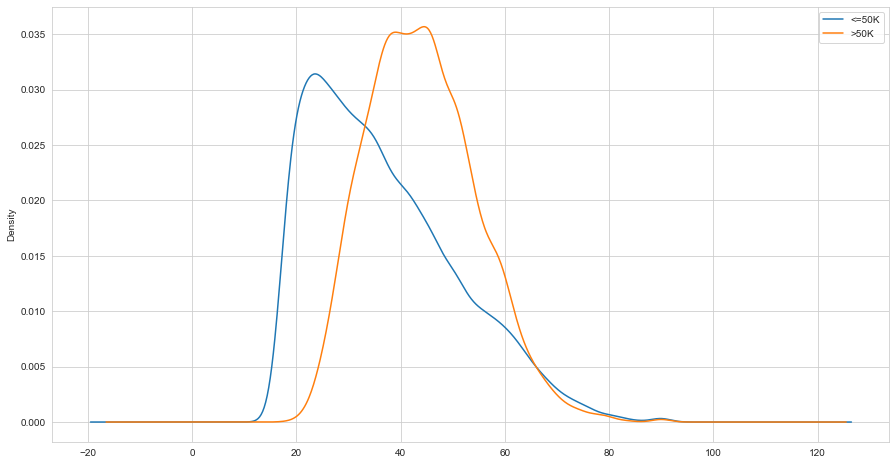

In [112]:
# Density of age grouped by income
plt.figure(figsize=(15,8))
replaced_df.groupby("income").age.plot(kind='kde')
plt.legend();

### Observation

* From the histogram of “age”, we can see that the bulk of individuals are bewtween 20 and 50 years old 
* Next we display the density of age grouped by income. From the plot we see that the majority of people earning more than 50K a year are between 33 and 55 years old, whereas the the greater number of people who earn less than 50K a year are between 18 and 45.
* The density plot clearly shows that age and income are correlated – people of greater age have higher income. This can be also seen from the histograms of age by income. SARAH - YOU WILL NEED TO BUILD THIS

### WORK WEEK - Mark
1. Do people who earn more than 50K tend to work more hours than those that earn less than 50K? 
2. Do men work more hours per week than women at all ages? 
3. At what age does the working hours per week decrease and by how much?

In [113]:
# Age vs. Average Hours per Week
ageGroup = replaced_df.groupby("age")
ageGroup[["age", "hours.per.week"]].mean()

,age,hours.per.week
age,,
17,17.0,21.345178
18,18.0,25.956124
19,19.0,30.718927
20,20.0,32.299601
21,21.0,34.045961
...,...,...
85,85.0,29.333333
86,86.0,40.000000
87,87.0,2.000000


In [114]:
age_summary = ageGroup["hours.per.week"].mean().to_frame(name = "avg hrs per week").reset_index()
age_summary

,age,avg hrs per week
0,17,21.345178
1,18,25.956124
2,19,30.718927
3,20,32.299601
4,21,34.045961
...,...,...
68,85,29.333333
69,86,40.000000
70,87,2.000000
71,88,40.000000


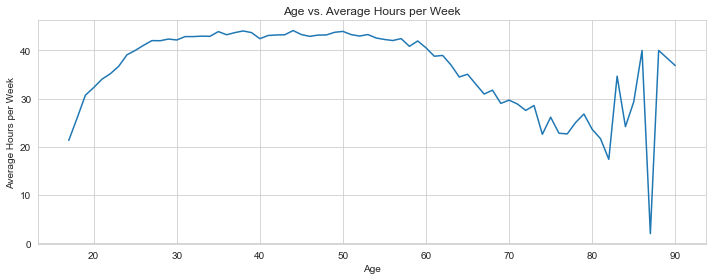

In [115]:
# Age vs. Average Hours per Week
plt.figure(figsize=(10,4))
plt.plot(age_summary["age"], age_summary["avg hrs per week"])
plt.title("Age vs. Average Hours per Week")
plt.xlabel("Age")
plt.ylabel("Average Hours per Week")
plt.tight_layout()
plt.show()

In [116]:
# Age vs. Average Hours per Week by Gender
ageGender = replaced_df.groupby(["age", "sex"])
ageGender[["age", "hours.per.week"]].mean()

age  hours.per.week
age sex                         
17  Female  17.0       19.940860
    Male    17.0       22.600962
18  Female  18.0       25.127341
    Male    18.0       26.746429
19  Female  19.0       28.715493
...          ...             ...
87  Male    87.0        2.000000
88  Female  88.0       40.000000
    Male    88.0       40.000000
90  Female  90.0       31.500000
    Male    90.0       39.535714

[144 rows x 2 columns]

In [117]:
ageGender_summary = ageGender["hours.per.week"].mean().to_frame(name = "avg hrs per week").reset_index()
ageGender_summary

,age,sex,avg hrs per week
0,17,Female,19.940860
1,17,Male,22.600962
2,18,Female,25.127341
3,18,Male,26.746429
4,19,Female,28.715493
...,...,...,...
139,87,Male,2.000000
140,88,Female,40.000000
141,88,Male,40.000000
142,90,Female,31.500000


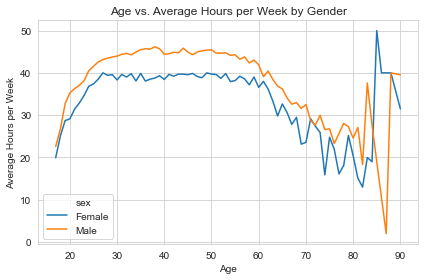

In [118]:
# Age vs. Average Hours per Week by Gender
import seaborn as sns

sns.lineplot(data=ageGender_summary, x="age", y="avg hrs per week", hue="sex")
plt.title("Age vs. Average Hours per Week by Gender")
plt.xlabel("Age")
plt.ylabel("Average Hours per Week")
plt.tight_layout()
plt.show()

### Observation

* This is a plot of average working hours per week versus age, grouped by gender. 
* From this graph we see that on average men work more hours per week than women at almost all ages. There is an exception for people between 77 and 80 and between 85 and 90, where women have more working hours per week on average. However, the latter observations are outliers. We believe that it is very unusual for people to work when they are over 80 years old, so we have to consider these extreme data points with caution. 
* We also notice that the average number of working hours per week for people between 25 and 60 years old is 40 hours for women and 45 hours for men. For people above 65, the average working hours per week gradually decrease and vary between about 15 and 30 hours.

### WORK CLASS - Katrice
1. Most people are employed in the private sector. Do people in the private sector earn more than the other work classes?

In [119]:
# Creating a group based off of the workclass
workclass_grp = replaced_df.groupby("workclass", as_index=False)
workclass_grp[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,age,education.num,capital.gain,capital.loss,hours.per.week
0,Federal-gov,42.590625,10.973958,833.232292,112.268750,41.379167
1,Local-gov,41.751075,11.042045,880.202580,109.854276,40.982800
2,Not-Available,40.960240,9.260349,606.795752,60.760349,31.919390
3,Private,36.801835,9.881136,890.119834,80.089887,40.271027
4,Self-emp-inc,46.017025,11.137097,4875.693548,155.138889,48.818100
5,Self-emp-not-inc,44.968110,10.226378,1886.804331,116.677559,44.423622
6,State-gov,39.436055,11.375963,701.699538,83.256549,39.031587
7,Without-pay,47.785714,9.071429,487.857143,0.000000,32.714286


In [120]:
# Workclass count
workclass_summary = workclass_grp[["age",]].count()
workclass_summary.rename(columns = {"age": "count"}, inplace = True)
workclass_summary

,workclass,count
0,Federal-gov,960
1,Local-gov,2093
2,Not-Available,1836
3,Private,22673
4,Self-emp-inc,1116
5,Self-emp-not-inc,2540
6,State-gov,1298
7,Without-pay,14


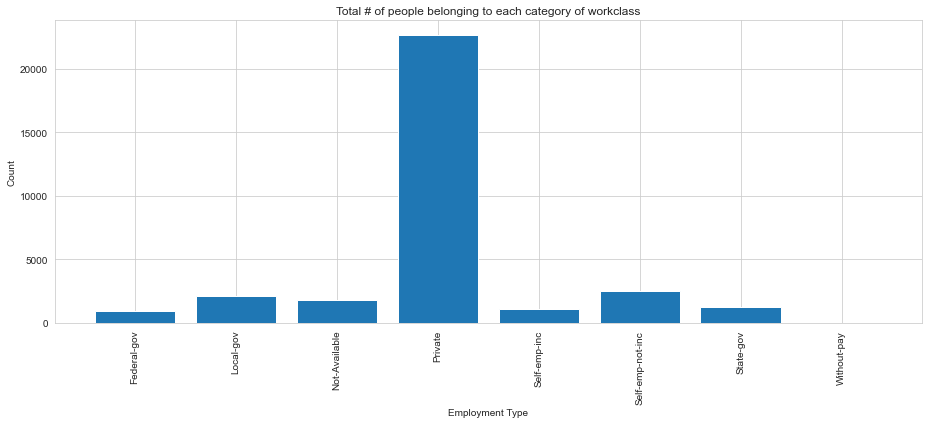

In [121]:
# Use Pyplot to generate a bar plot showing the number of people belonging to each category of “workclass”
plt.figure(figsize=(13,6))
plt.bar("workclass", "count",data=workclass_summary)
plt.title("Total # of people belonging to each category of workclass")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

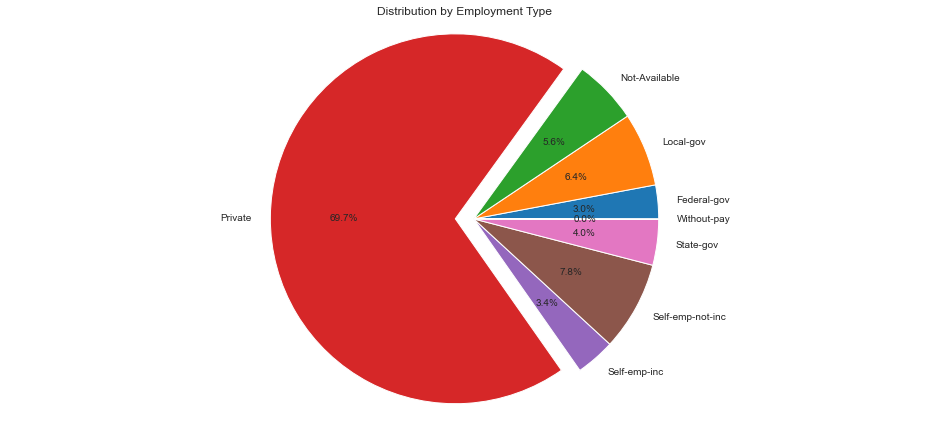

In [122]:
# Use Pandas to generate a pie plot showing the distribution of workclass
plt.figure(figsize=(13,6))
explode = (0, 0, 0, 0.1, 0, 0, 0, 0)
plt.pie(workclass_summary["count"], labels=workclass_summary["workclass"], explode=explode, autopct='%1.1f%%')
plt.title("Distribution by Employment Type")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [123]:
# Creating a group based off of the workclass
workclass_group = replaced_df.groupby(["workclass", "income"], as_index=False)
workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Federal-gov,<=50K,40.624788,10.483871,173.207131,91.278438,40.093379
1,Federal-gov,>50K,45.711590,11.752022,1881.088949,145.592992,43.420485
2,Local-gov,<=50K,40.704607,10.580623,169.179539,79.185637,39.739837
3,Local-gov,>50K,44.254457,12.145867,2581.126418,183.220421,43.956240
4,Not-Available,<=50K,39.258359,9.023100,159.157447,47.961702,31.428571
5,Not-Available,>50K,55.617801,11.303665,4462.109948,170.989529,36.146597
6,Private,<=50K,35.117209,9.447550,137.621217,50.000226,38.806007
7,Private,>50K,42.816368,11.429147,3576.726466,187.517436,45.501512
8,Self-emp-inc,<=50K,43.206478,10.198381,177.941296,54.368421,47.135628
9,Self-emp-inc,>50K,48.249196,11.882637,8606.705788,235.172026,50.154341


In [124]:
# Workclass-income category count
workclass_income = workclass_group[["age"]].count()
workclass_income.rename(columns = {"age": "count"}, inplace = True)
workclass_income

,workclass,income,count
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,Not-Available,<=50K,1645
5,Not-Available,>50K,191
6,Private,<=50K,17712
7,Private,>50K,4961
8,Self-emp-inc,<=50K,494
9,Self-emp-inc,>50K,622


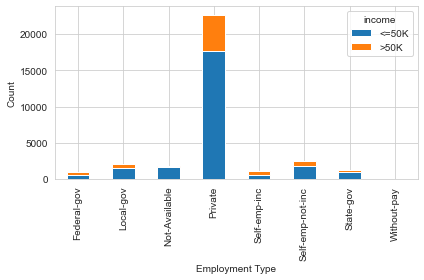

In [125]:
replaced_df.groupby(["workclass", "income"]).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [126]:
# Private Workclass
private_workclass = replaced_df[replaced_df["workclass"] == "Private"]
private_workclass

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,34-40,40-45 hours,United States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,34-40,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


In [127]:
# Creating a group based off of the Private workclass
private_workclass_group = private_workclass.groupby(["workclass", "income"], as_index=False)
private_workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Private,<=50K,35.117209,9.447550,137.621217,50.000226,38.806007
1,Private,>50K,42.816368,11.429147,3576.726466,187.517436,45.501512


In [128]:
# Private workclass-income category count
private_workclass_income = private_workclass_group[["age"]].count()
private_workclass_income.rename(columns = {"age": "count"}, inplace = True)
private_workclass_income

,workclass,income,count
0,Private,<=50K,17712
1,Private,>50K,4961


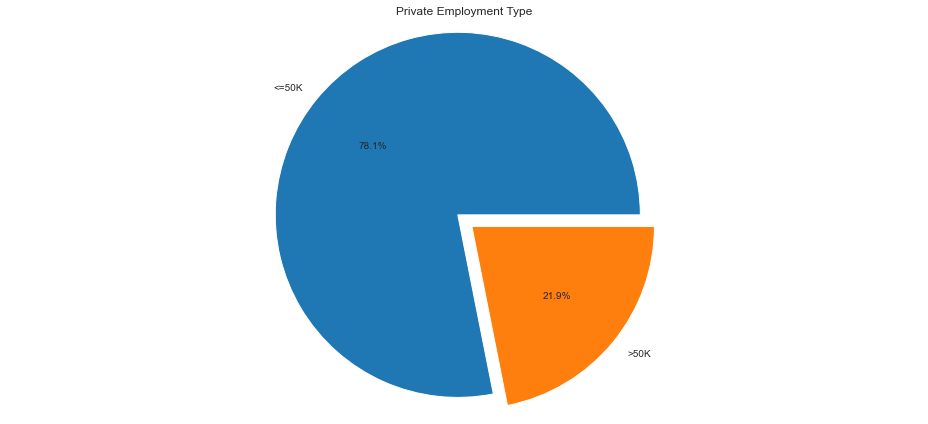

In [129]:
# Private Work Class - plot the percentage of people earning less than 50K and more than 50K
plt.figure(figsize=(13,6))
explode = (0.1, 0)
plt.pie(private_workclass_income["count"], labels=private_workclass_income["income"], explode=explode, autopct='%1.1f%%')
plt.title("Private Employment Type")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [130]:
# Self-emp-inc Workclass
Self_emp_inc_workclass = replaced_df[replaced_df["workclass"] == "Self-emp-inc"]
Self_emp_inc_workclass

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
28,37,Self-emp-inc,107164,10th,6,Never-married,Transport-moving,Not-in-family,White,Male,0,2559,50,United-States,>50K,34-40,46-60 hours,United States
31,59,Self-emp-inc,107287,10th,6,Widowed,Exec-managerial,Unmarried,White,Female,0,2559,50,United-States,>50K,58-65,46-60 hours,United States
61,50,Self-emp-inc,121441,11th,7,Never-married,Exec-managerial,Other-relative,White,Male,0,2444,40,United-States,>50K,41-57,40-45 hours,United States
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,Not-Available,>50K,58-65,61-80 hours,Not-Available
67,55,Self-emp-inc,124137,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,35,Greece,>50K,41-57,< 40 hours,Europe West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32290,51,Self-emp-inc,28765,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,41-57,46-60 hours,United States
32357,37,Self-emp-inc,328466,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,34-40,46-60 hours,United States
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Not-Available,>50K,41-57,46-60 hours,Not-Available
32472,45,Self-emp-inc,173664,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,41-57,40-45 hours,United States


In [131]:
# Creating a group based off of the Self-emp-inc workclass
Self_emp_inc_workclass_group = Self_emp_inc_workclass.groupby(["workclass", "income"], as_index=False)
Self_emp_inc_workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Self-emp-inc,<=50K,43.206478,10.198381,177.941296,54.368421,47.135628
1,Self-emp-inc,>50K,48.249196,11.882637,8606.705788,235.172026,50.154341


In [132]:
# Self-emp-inc workclass-income category count
Self_emp_inc_workclass_income = Self_emp_inc_workclass_group[["age"]].count()
Self_emp_inc_workclass_income.rename(columns = {"age": "count"}, inplace = True)
Self_emp_inc_workclass_income

,workclass,income,count
0,Self-emp-inc,<=50K,494
1,Self-emp-inc,>50K,622


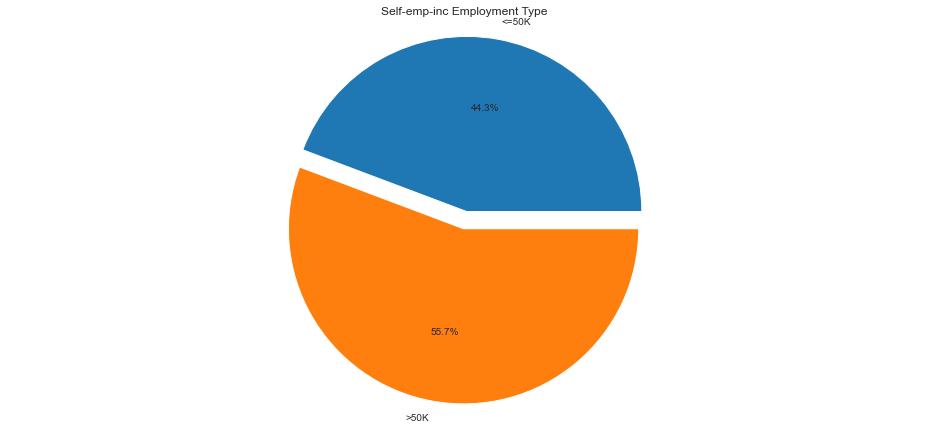

In [133]:
# Self-emp-inc Work Class - plot the percentage of people earning less than 50K and more than 50K
plt.figure(figsize=(13,6))
explode = (0.1, 0)
plt.pie(Self_emp_inc_workclass_income["count"], labels=Self_emp_inc_workclass_income["income"], explode=explode, autopct='%1.1f%%')
plt.title("Self-emp-inc Employment Type")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [134]:
# Federal-gov Workclass
Federal_gov_workclass = replaced_df[replaced_df["workclass"] == "Federal-gov"]
Federal_gov_workclass

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,66-78,40-45 hours,United States
35,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,0,2559,60,United-States,>50K,58-65,46-60 hours,United States
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,Not-Available,>50K,41-57,46-60 hours,Not-Available
163,57,Federal-gov,370890,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,2258,40,United-States,<=50K,41-57,40-45 hours,United States
171,57,Federal-gov,199114,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,2258,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32340,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,<=50K,23-33,< 40 hours,United States
32402,28,Federal-gov,381789,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K,23-33,46-60 hours,United States
32405,59,Federal-gov,23789,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,>50K,58-65,40-45 hours,United States


In [135]:
# Creating a group based off of the Federal-gov workclass
Federal_gov_workclass_group = Federal_gov_workclass.groupby(["workclass", "income"], as_index=False)
Federal_gov_workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Federal-gov,<=50K,40.624788,10.483871,173.207131,91.278438,40.093379
1,Federal-gov,>50K,45.711590,11.752022,1881.088949,145.592992,43.420485


In [136]:
# Federal-gov workclass-income category count
Federal_gov_workclass_income = Federal_gov_workclass_group[["age"]].count()
Federal_gov_workclass_income.rename(columns = {"age": "count"}, inplace = True)
Federal_gov_workclass_income

,workclass,income,count
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371


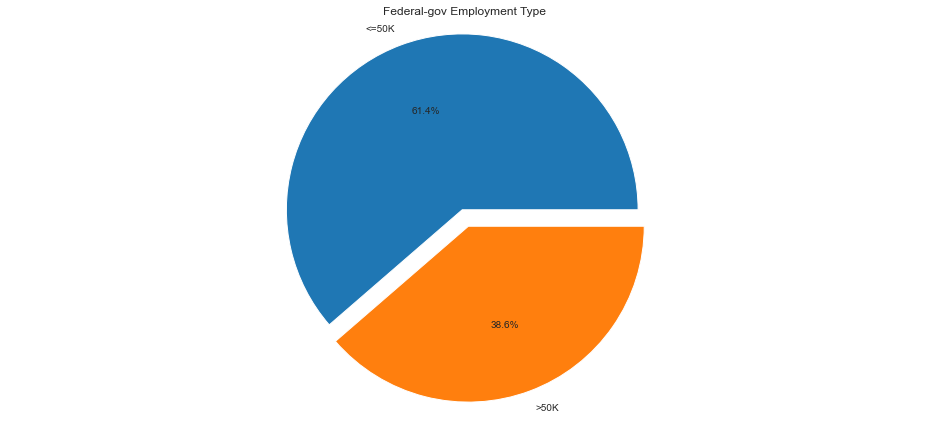

In [137]:
# Federal-gov Work Class - plot the percentage of people earning less than 50K and more than 50K
plt.figure(figsize=(13,6))
explode = (0.1, 0)
plt.pie(Federal_gov_workclass_income["count"], labels=Federal_gov_workclass_income["income"], explode=explode, autopct='%1.1f%%')
plt.title("Federal-gov Employment Type")
plt.axis("equal")
plt.tight_layout()
plt.show()

### Observation

* We notice that the majority of people are employed in the private sector.
* Next we show a graph with the percentage of people belonging to each category of “workclass”.
* Plot the percentage of people earning less than 50K and more than 50K based on their employment status (Private, Self-emp-inc)
* From the graphs above, we can see that the percentage of individuals having an income of more than 50K is biggest for the category “Self-emp-inc” (self-employed people with income) – 55.7%. The group with the second highest percentage of people earning more than 50K is that of federal government employees - 38.6%.
* There is no significant difference between the categories "Local-gov" (local government), "Self-emp-not-inc" (self-employed individuals without income) and "State-gov" (state government jobs) - about 27-28% of the workers in these branches have an annual pay of more than 50K. 
* In the private sector only about 22% of the people earn more than 50K a year. 
* These results demonstrate that there is a relationship between the variables “income” and “workclass”.

## Step 4:  Deliver results

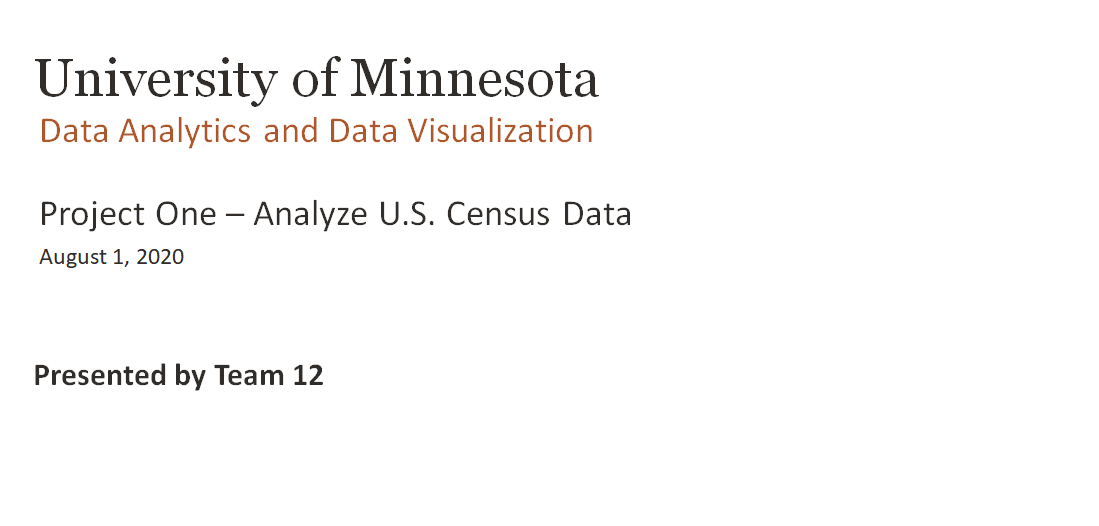